In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

from prophet import Prophet

In [2]:
df = pd.read_csv('daily-website-visitors.csv', index_col = 'Date', parse_dates = True)
df.index.freq = 'D'
df

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,"2,146","1,582","1,430",152
2014-09-15,2,Monday,2,"3,621","2,528","2,297",231
2014-09-16,3,Tuesday,3,"3,698","2,630","2,352",278
2014-09-17,4,Wednesday,4,"3,667","2,614","2,327",287
2014-09-18,5,Thursday,5,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...
2020-08-15,2163,Saturday,7,"2,221","1,696","1,373",323
2020-08-16,2164,Sunday,1,"2,724","2,037","1,686",351
2020-08-17,2165,Monday,2,"3,456","2,638","2,181",457


### Data is in object type instead of int, have to get rid of comma after thousands

In [3]:
df['First.Time.Visits'] = df['First.Time.Visits'].str.replace(',', '')
df['First.Time.Visits'] = df['First.Time.Visits'].astype(int)

In [4]:
df1 = df['First.Time.Visits']
df1

Date
2014-09-14    1430
2014-09-15    2297
2014-09-16    2352
2014-09-17    2327
2014-09-18    2130
              ... 
2020-08-15    1373
2020-08-16    1686
2020-08-17    2181
2020-08-18    2184
2020-08-19    1297
Freq: D, Name: First.Time.Visits, Length: 2167, dtype: int32

C:\Users\Rudy\AppData\Local\Temp/ipykernel_18328/3189490167.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultSeasonal = seasonal_decompose(df1, freq = 7)


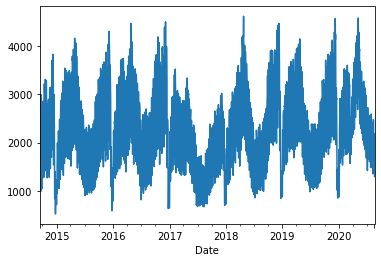

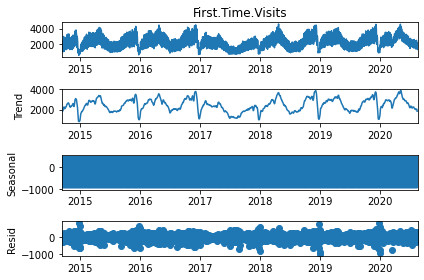

In [6]:
df1.plot()
resultSeasonal = seasonal_decompose(df1, freq = 7)
resultSeasonal.plot();

### Starting out with auto-arima

In [7]:
auto_arima(df1, seasonal = True, m = 7, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=29239.214, Time=3.43 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=33582.394, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=29798.887, Time=0.65 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=31761.991, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=33580.394, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=30650.623, Time=2.98 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=11.37 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=inf, Time=10.66 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=31477.422, Time=0.98 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=30574.240, Time=6.44 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=inf, Time=11.85 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=29184.157, Time=3.43 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=3122

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2167
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 7)   Log Likelihood              -14584.949
Date:                             Fri, 13 May 2022   AIC                          29181.898
Time:                                     14:20:45   BIC                          29215.982
Sample:                                          0   HQIC                         29194.362
                                            - 2167                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3412      0.060      5.684      0.000       0.224       0.459
ma.L1         -0.3571      0.062     -5.789      0.000      -0.478      -0.236
ma.L2         -0.2031      0.020    -10.095      0.000      -0.243      -0.164
ar.S.L7        1.0000   3.67e-05   2.72e+04      0.000       1.000       1.000
ma.S.L7       -0.8162      0.012    -68.249      0.000      -0.840      -0.793
sigma2      4.062e+04    848.870     47.850      0.000     3.9e+04    4.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               647.34
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train-test split

In [8]:
train_data = df1.iloc[:-30]
test_data = df1.iloc[-30:]

### Simple Exponential Smoothing

In [9]:
fitSES2 = SimpleExpSmoothing(train_data).fit()
fcastSES2 = fitSES2.forecast(len(test_data)).rename('SES predict')
print(mean_absolute_percentage_error(test_data, fcastSES2))

0.23695891753210677


c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


### Holt's method

In [10]:
fitHolt1_2 = Holt(train_data, exponential = False).fit()
fcastHolt1_2 = fitHolt1_2.forecast(len(test_data)).rename("Holt's predict 1")

#Damped trend
fitHolt2_2 = Holt(train_data, damped_trend = True).fit()
fcastHolt2_2 = fitHolt2_2.forecast(len(test_data)).rename("Holt's predict 2")

#finding out the best one based on MAPE
print(mean_absolute_percentage_error(test_data, fcastHolt1_2))
print(mean_absolute_percentage_error(test_data, fcastHolt2_2))

0.20599586600524325
0.2228381620874419


c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


##### Errores for both SES and Holt are too big to even consider them for final forecast.

### Holt-Winter's method

In [11]:
#both additive
fitHoltWinter2 = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods = 7).fit()
fcastHoltWinter2 = fitHoltWinter2.forecast(len(test_data)).rename("Holt-Winter's predict")

print(mean_absolute_percentage_error(test_data, fcastHoltWinter2))

c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.21759981970645764


c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


##### Still really big MAPE.

### SARIMA

In [12]:
fitSARIMA2 = SARIMAX(train_data, order = (0, 1, 2), seasonal_order = (1, 0, 2, 7)).fit()
fitSARIMA2.summary()

c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                 First.Time.Visits   No. Observations:                 2137
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 7)   Log Likelihood              -14332.561
Date:                           Fri, 13 May 2022   AIC                          28677.121
Time:                                   14:20:49   BIC                          28711.121
Sample:                               09-14-2014   HQIC                         28689.564
                                    - 07-20-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0688      0.016     -4.249      0.000      -0.101      -0.037
ma.L2         -0.2293      0.018    -12.666      0.000      -0.265      -0.194
ar.S.L7        1.0000   2.69e-05   3.71e+04      0.000       1.000       1.000
ma.S.L7       -0.6974      0.018    -38.484      0.000      -0.733      -0.662
ma.S.L14      -0.2589      0.018    -14.764      0.000      -0.293      -0.225
sigma2      3.876e+04   8.08e-08    4.8e+11      0.000    3.88e+04    3.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.35   Jarque-Bera (JB):               285.29
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.07e+25. Standard errors may be unstable.
"""

In [13]:
start = len(train_data)
end = start + len(test_data) - 1
fcastSARIMA2 = fitSARIMA2.predict(start = start, end = end, dynamic = False).rename('SARIMA')
print(mean_absolute_percentage_error(test_data, fcastSARIMA2))

0.08799316761231335


### Prophet

In [14]:
data = train_data.reset_index()[['Date', 'First.Time.Visits']]
data.columns = ['ds', 'y']
data

,ds,y
0,2014-09-14,1430
1,2014-09-15,2297
2,2014-09-16,2352
3,2014-09-17,2327
4,2014-09-18,2130
...,...,...
2132,2020-07-16,2463
2133,2020-07-17,2122
2134,2020-07-18,1606
2135,2020-07-19,1892


In [15]:
fitProphet = Prophet(weekly_seasonality = True)
fitProphet.fit(data)
future = fitProphet.make_future_dataframe(len(test_data))
fcastProphet = fitProphet.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##### Going back to normal dataframe

In [16]:
prophetForecast2 = fcastProphet[['ds', 'yhat']].iloc[-len(test_data):]
prophetForecast2.set_index('ds', inplace = True)
prophetForecast2.index.name = 'Date'
prophetForecast2.columns = ['Prophet']
prophetForecast2.index.freq = 'D'
prophetForecast2

,Prophet
Date,
2020-07-21,2718.915889
2020-07-22,2686.036950
2020-07-23,2530.421491
2020-07-24,1940.790216
2020-07-25,1248.172355
2020-07-26,1719.798283
2020-07-27,2627.903236
2020-07-28,2695.068820
2020-07-29,2659.032941


In [17]:
mean_absolute_percentage_error(test_data, prophetForecast2['Prophet'])

0.12622839895747606

### Plotting all of the best models

<AxesSubplot:xlabel='Date'>

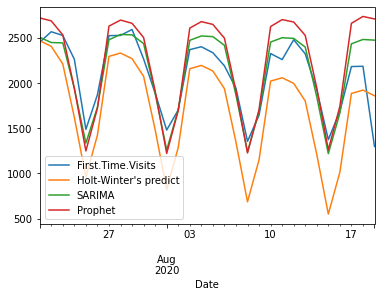

In [18]:
test_data.plot(legend = True)
fcastHoltWinter2.plot(legend = True)
fcastSARIMA2.plot(legend = True)
prophetForecast2['Prophet'].plot(legend = True)

##### Even though the MAPE were really big, the forecasts don't look too bad.

### Final forecast for 30 days into the future

In [19]:
#Holt-Winter's method
fitHoltWinter2 = ExponentialSmoothing(df1, trend = 'add', seasonal = 'add', seasonal_periods = 7).fit()
fcastHoltWinter2 = fitHoltWinter2.forecast(30).rename("Holt-Winter's predict")

#SARIMA
fitSARIMA2 = SARIMAX(df1, order = (0, 1, 2), seasonal_order = (1, 0, 2, 7)).fit()
start = len(df1)
end = start + 29
fcastSARIMA2 = fitSARIMA2.predict(start = start, end = end, dynamic = False).rename('SARIMA')

#Prophet
data = df1.reset_index()[['Date', 'First.Time.Visits']]
data.columns = ['ds', 'y']
fitProphet = Prophet(weekly_seasonality = True)
fitProphet.fit(data)
future = fitProphet.make_future_dataframe(30)
fcastProphet = fitProphet.predict(future)

#going back to normal dataframe from prophet
prophetForecast2 = fcastProphet[['ds', 'yhat']].iloc[-30:]
prophetForecast2.set_index('ds', inplace = True)
prophetForecast2.index.name = 'Date'
prophetForecast2.columns = ['Prophet']
prophetForecast2.index.freq = 'D'

c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='Date'>

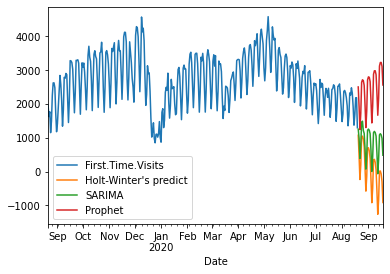

In [20]:
df1.tail(365).plot(legend = True)
fcastHoltWinter2.plot(legend = True)
fcastSARIMA2.plot(legend = True)
prophetForecast2['Prophet'].plot(legend = True)